In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os
print('we are ready boss !!!')

we are ready boss !!!


In [42]:
import tensorflow as tf
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

from __future__ import print_function
#import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.layers.advanced_activations import ELU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
print('All imported !!!')

# Images explorations 

In [43]:
# Get filenames in list
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2
mypath = '/content/drive/MyDrive/Colab Notebooks/Recruitment Data'
classes = listdir(mypath) #each classes in the training dataset
classes

['Non Defective Boxes', 'Defective Boxes', 'model.h5']

In [44]:
train_class0 = [f for f in listdir(join(mypath,classes[0])) if isfile(join(mypath,classes[0],f))]
train_class1 = [f for f in listdir(join(mypath,classes[1])) if isfile(join(mypath,classes[1],f))]
classes_list = [train_class0,train_class1]
for i,k in enumerate(classes_list):
    print(str(len(k)) + ' images loaded from class ' + str(i) + ' = '+classes[i])
    #converting each classes into an array 
    classes_list[i] = np.array(classes_list[i])

1680 images loaded from class 0 = Non Defective Boxes
468 images loaded from class 1 = Defective Boxes


image shape : (280, 393, 3)


IndexError: ignored

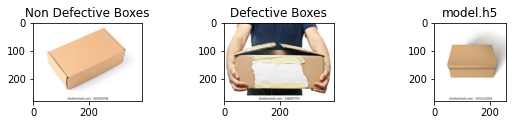

In [45]:
# load and display an image with Matplotlib
import matplotlib.pyplot as plt
from matplotlib import image
images_list = []
count = 0
for i in range(1,37):
    random_num = np.random.randint(0, len(classes_list[count]))
    images_list.append(image.imread(join(mypath,classes[count],classes_list[count][random_num]))) # load image as pixel array
    count +=1
    if (count==len(classes_list)):
        count = 0 
        

print(f'image shape : {images_list[0].shape}')

plt.figure(figsize=(20,10))
columns = 6
for i, img in enumerate(images_list):
    if (i<columns):#simply applying title to each column
        title = classes[i]
        plt.subplot(len(images_list) / columns , columns, i + 1,title =title)
        plt.imshow(img,cmap='gray')
    else: #without title
        plt.subplot(len(images_list) / columns , columns, i + 1)
        plt.imshow(img,cmap='gray')

# Data augmentation to avoid overfitting 

In [46]:
import keras
 

In [47]:
keras.__version__

'2.7.0'

In [48]:
num_classes = 2
img_rows, img_cols = 224, 224
batch_size = 16


#instance of the ImageDataGenerator for the train with instatiated parameters 
train_datagen = keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.25)

#instance of the ImageDataGenerator for the Validation with instatiated parameters  
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

#the main generator 
train_generator = train_datagen.flow_from_directory(
        mypath,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='binary',
        subset='training')
#the main generator
validation_generator = train_datagen.flow_from_directory(
        mypath,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='binary',
        subset='validation')

Found 1611 images belonging to 2 classes.
Found 537 images belonging to 2 classes.


# Model architecture

In [49]:
from keras.layers import Conv2D

In [50]:
model = Sequential()

#block 1: first Convolution => ELU =>Convolution => ELU => POOL
# layer set
# model.add(Conv2D(16, (3, 3), padding = 'same', kernel_initializer="he_normal",
#                  input_shape = (img_rows, img_cols, 1)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Conv2D(16, (3, 3), padding = "same", kernel_initializer="he_normal", 
#                  input_shape = (img_rows, img_cols, 1)))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))



#block 1: first Convolution => ELU =>Convolution => ELU => POOL
# layer set
model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2: second Convolution => ELU => CONV => ELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #3: third  Convolution => ELU => CONV => ELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


# Block #4: fourth  Convolution => ELU => CONV => ELU => POOL
# layer set
# model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# # Block #4: fourth  Convolution => ELU => CONV => ELU => POOL
# # layer set
# model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))


# Block #5: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# # Block #6: second set of FC => RELU layers
# model.add(Dense(64, kernel_initializer="he_normal"))
# model.add(Activation('elu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(32, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))



# Block #7: softmax classifier
model.add(Dense(1, kernel_initializer="he_normal"))
model.add(Activation("sigmoid"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 activation_10 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 batch_normalization_9 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_11 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 batch_normalization_10 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                     

# Training Model

In [51]:
# Adam RMSprop, SGD,

In [52]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

saved_model_path =  mypath + '/model.h5'                 
checkpoint = ModelCheckpoint(saved_model_path ,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])

nb_train_samples = 1611
nb_validation_samples = 537
epochs = 25

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.8603 - accuracy: 0.5850
Epoch 00001: val_loss improved from inf to 0.76079, saving model to /content/drive/MyDrive/Colab Notebooks/Recruitment Data/model.h5
100/100 [==============================] - 680s 7s/step - loss: 0.8603 - accuracy: 0.5850 - val_loss: 0.7608 - val_accuracy: 0.7936 - lr: 0.0010
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.7133 - accuracy: 0.6520
Epoch 00002: val_loss improved from 0.76079 to 0.47554, saving model to /content/drive/MyDrive/Colab Notebooks/Recruitment Data/model.h5
100/100 [==============================] - 677s 7s/step - loss: 0.7133 - accuracy: 0.6520 - val_loss: 0.4755 - val_accuracy: 0.8144 - lr: 0.0010
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.6646 - accuracy: 0.6928
Epoch 00003: val_loss improved from 0.47554 to 0.43880, saving model to /content/drive/MyDrive/Colab Notebooks/Recruitment Data/model.h5
100/100 [======

# Pretrained

In [53]:
num_classes = 2
img_rows, img_cols = 224, 224
batch_size = 16


#instance of the ImageDataGenerator for the train with instatiated parameters 
train_datagen = keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.25)

#instance of the ImageDataGenerator for the Validation with instatiated parameters  
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

#the main generator 
train_generator = train_datagen.flow_from_directory(
        mypath,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='binary',
        subset='training')
#the main generator
validation_generator = train_datagen.flow_from_directory(
        mypath,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='binary',
        subset='validation')

Found 1611 images belonging to 2 classes.
Found 537 images belonging to 2 classes.


In [54]:
from tensorflow.keras.applications import ResNet50V2

In [55]:
pretrained = tf.keras.applications.VGG19(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (224, 224,3))
# pretrained = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
#                                                include_top=False,
#                                                weights='imagenet')

In [56]:
# Layers are set to trainable as True by default
for layer in pretrained.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(pretrained.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 Conv2D False
11 MaxPooling2D False
12 Conv2D False
13 Conv2D False
14 Conv2D False
15 Conv2D False
16 MaxPooling2D False
17 Conv2D False
18 Conv2D False
19 Conv2D False
20 Conv2D False
21 MaxPooling2D False


In [57]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,GlobalAveragePooling2D
def addTopModelResNet50(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(64,activation='relu')(top_model)
    top_model = Dense(1,activation='sigmoid')(top_model)
    return top_model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

FC_Head = addTopModelResNet50(pretrained, num_classes)

model = Model(inputs = pretrained.input, outputs = FC_Head)

print(model.summary())

In [60]:
model.compile(loss = 'binary_crossentropy',
              # optimizer = Adam(lr=0.001),
              optimizer = 'adam',
              metrics = ['accuracy'])

In [61]:
result = model.fit_generator(train_generator,epochs=70,callbacks=callbacks,validation_data=validation_generator,steps_per_epoch = nb_train_samples // batch_size,validation_steps= nb_validation_samples // batch_size )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/70
100/100 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.7925 
Epoch 00001: val_loss improved from 0.42526 to 0.38068, saving model to /content/drive/MyDrive/Colab Notebooks/Recruitment Data/model.h5
100/100 [==============================] - 1349s 14s/step - loss: 0.4676 - accuracy: 0.7925 - val_loss: 0.3807 - val_accuracy: 0.8144 - lr: 0.0010
Epoch 2/70
100/100 [==============================] - ETA: 0s - loss: 0.4248 - accuracy: 0.7912 
Epoch 00002: val_loss improved from 0.38068 to 0.33554, saving model to /content/drive/MyDrive/Colab Notebooks/Recruitment Data/model.h5
100/100 [==============================] - 1355s 14s/step - loss: 0.4248 - accuracy: 0.7912 - val_loss: 0.3355 - val_accuracy: 0.8636 - lr: 0.0010
Epoch 3/70
100/100 [==============================] - ETA: 0s - loss: 0.4011 - accuracy: 0.8201 
Epoch 00003: val_loss did not improve from 0.33554
100/100 [==============================] - 1349s 14s/step - loss: 0.4011 - accuracy: 0.820

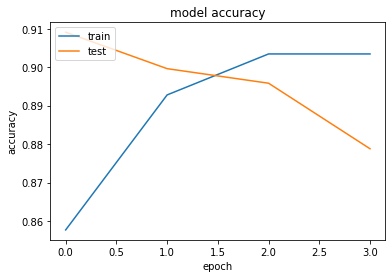

In [66]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

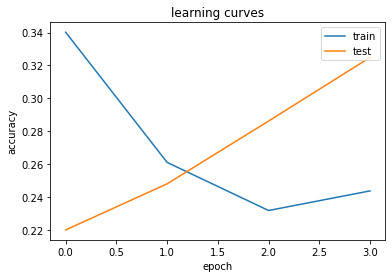

In [67]:
plt.plot(result.history['loss'],label='train')
plt.plot(result.history['val_loss'],label='val')
plt.title('learning curves')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
!pip install jupyterlab-widgets
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
